# Sierra Leone Solar Dataset — Data Profiling, Cleaning & Exploratory Data Analysis (EDA)
*Week 0 Solar Challenge*


# 1. Introduction

This notebook performs data profiling, cleaning, and exploratory data analysis (EDA) on the Sierra Leone solar radiation dataset.  
The data contains solar irradiance (GHI, DNI, DHI), temperature, humidity, wind, and other meteorological variables recorded from the Bumbuna station in Sierra Leone.

The main objectives are:
- Assess data quality and completeness.
- Clean and standardize sensor readings.
- Detect and handle outliers.
- Explore relationships between variables such as irradiance, temperature, wind, and humidity.
- Generate key visual insights for further modeling or regional comparison.

## 2. Setup and Data Loading
This section imports required libraries and loads the dataset into memory.


In [2]:
# 2. Setup & Data Loading

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# File path
data_path = os.path.join("..", "data", "sierraleone-bumbuna.csv")

# Load the dataset
df = pd.read_csv(data_path, parse_dates=["Timestamp"], low_memory=False)
df.sort_values("Timestamp", inplace=True)
df.reset_index(drop=True, inplace=True)

# Basic preview
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


### Observation
The dataset has been successfully loaded, sorted by timestamp, and the first few rows show typical time-series solar measurements.
Columns include irradiance (GHI, DNI, DHI), temperature (Tamb, TModA, TModB), wind (WS, WSgust, WD), and humidity (RH).


## 3. Data Profiling
Initial dataset inspection, structure overview, and summary statistics.


In [3]:
# Structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [4]:
# Summary statistics for numeric columns
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-30 12:00:30.000000768,2021-10-30 00:01:00,2022-01-29 06:00:45,2022-04-30 12:00:30,2022-07-30 18:00:15,2022-10-30 00:00:00,NaN
GHI,525600.0,201.957515,-19.5,-2.8,0.3,362.4,1499.0,298.49515
DNI,525600.0,116.376337,-7.8,-0.3,-0.1,107.0,946.0,218.652659
DHI,525600.0,113.720571,-17.9,-3.8,-0.1,224.7,892.0,158.946032
ModA,525600.0,206.643095,0.0,0.0,3.6,359.5,1507.0,300.896893
ModB,525600.0,198.114691,0.0,0.0,3.4,345.4,1473.0,288.889073
Tamb,525600.0,26.319394,12.3,23.1,25.3,29.4,39.9,4.398605
RH,525600.0,79.448857,9.9,68.7,85.4,96.7,100.0,20.520775
WS,525600.0,1.146113,0.0,0.0,0.8,2.0,19.2,1.239248
WSgust,525600.0,1.691606,0.0,0.0,1.6,2.6,23.9,1.617053


In [5]:
# Missing value report
na_counts = df.isna().sum()
na_percent = (na_counts / len(df)) * 100
pd.concat([na_counts, na_percent], axis=1, keys=["missing_count", "missing_percent"]).sort_values("missing_percent", ascending=False)


,missing_count,missing_percent
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


### Observation

- The dataset contains several numeric columns with thousands of records.
- Most columns have no missing values (0%), indicating complete sensor data capture.
- No non-numeric columns except `Timestamp` and possibly `Comments`.
- The data types are appropriate for numerical analysis.


## 4. Data Cleaning
Outlier detection, physical range validation, and Z-score filtering.


## 4.1 Physical Ranges & Corrections

In [9]:
# Define realistic physical ranges for variables
expected_ranges = {
    "GHI": (0, 1200),
    "DNI": (0, 1500),
    "DHI": (0, 1000),
    "ModA": (0, 1500),
    "ModB": (0, 1500),
    "Tamb": (-40, 60),
    "RH": (0, 100),
    "WS": (0, 60),
    "WSgust": (0, 80),
    "WSstdev": (0, 20),
    "WD": (0, 360),
    "WDstdev": (0, 180),
    "BP": (800, 1100),
    "Cleaning": (0, 1),
    "Precipitation": (0, 100),
    "TModA": (-20, 90),
    "TModB": (-20, 90)
}

# Check for violations
violations = []
for col, (low, high) in expected_ranges.items():
    if col in df.columns:
        below = (df[col] < low).sum()
        above = (df[col] > high).sum()
        if below > 0 or above > 0:
            violations.append((col, below, above))

pd.DataFrame(violations, columns=["Column", "BelowRange", "AboveRange"])


,Column,BelowRange,AboveRange
0,GHI,261135,637
1,DNI,266352,0
2,DHI,263128,0
3,ModA,0,1


In [11]:
# Clip negative or extreme values
for c in ["GHI", "DNI", "DHI"]:
    if c in df.columns:
        df[c] = df[c].clip(lower=0)

# Optional: Cap extreme outliers above physical range
for c, (low, high) in expected_ranges.items():
    if c in df.columns:
        df[c] = df[c].clip(lower=low, upper=high)


## Observations
- Negative or physically impossible irradiance and wind values were clipped to valid ranges.
- Extreme spikes above sensor limits were capped.
- Data is now physically consistent for further analysis.


## 4.2 Outlier Detection — Z-Score

In [14]:
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
available = [c for c in cols_to_check if c in df.columns]

z = np.abs(stats.zscore(df[available], nan_policy='omit'))
z_df = pd.DataFrame(z, columns=available, index=df.index)
outlier_mask = (z_df > 3).any(axis=1)

print("Outliers flagged:", outlier_mask.sum())
df["is_outlier_z3_any"] = outlier_mask

# Drop or keep
df = df[~df["is_outlier_z3_any"]].copy()


Outliers flagged: 16561


## Observation

Z-score analysis identified a small number of extreme outliers (|Z| > 3) mainly in irradiance and wind columns.  
These were likely sensor spikes or transmission errors and have been removed to improve data quality.


## 4.3 Export Cleaned Data

In [16]:
output_path = os.path.join("..", "data", "sierraleone-bumbuna_clean.csv")
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")


Cleaned data saved to: ..\data\sierraleone-bumbuna_clean.csv


## Observations
The cleaned dataset has been exported to `data/sierraleone-bumbuna_clean.csv` for safe keeping.  
This file is ignored by Git via `.gitignore` to avoid committing raw or large data.


## 5. Time Series Analysis

This section visualizes how solar irradiance and temperature change over time.
The goal is to observe daily and seasonal patterns, detect anomalies, and confirm the dataset behaves physically as expected.

### 5.1 Solar Irradiance and Temperature Over Time
The plots below display GHI, DNI, DHI, and ambient temperature (Tamb) across the entire recorded period.


In [18]:
df.set_index("Timestamp", inplace=True)
df_hourly = df.resample("h").mean().reset_index()

plt.figure(figsize=(14, 4))
plt.plot(df_hourly["Timestamp"], df_hourly["GHI"], label="GHI")
plt.plot(df_hourly["Timestamp"], df_hourly["DNI"], label="DNI")
plt.plot(df_hourly["Timestamp"], df_hourly["DHI"], label="DHI")
plt.title("Sierra Leone — Hourly Irradiance Trends")
plt.xlabel("Time")
plt.ylabel("W/m²")
plt.legend()
plt.show()

plt.figure(figsize=(14, 3))
plt.plot(df_hourly["Timestamp"], df_hourly["Tamb"], color="orange")
plt.title("Sierra Leone — Temperature (Tamb) Over Time")
plt.xlabel("Time")
plt.ylabel("°C")
plt.show()


KeyError: "None of ['Timestamp'] are in the columns"

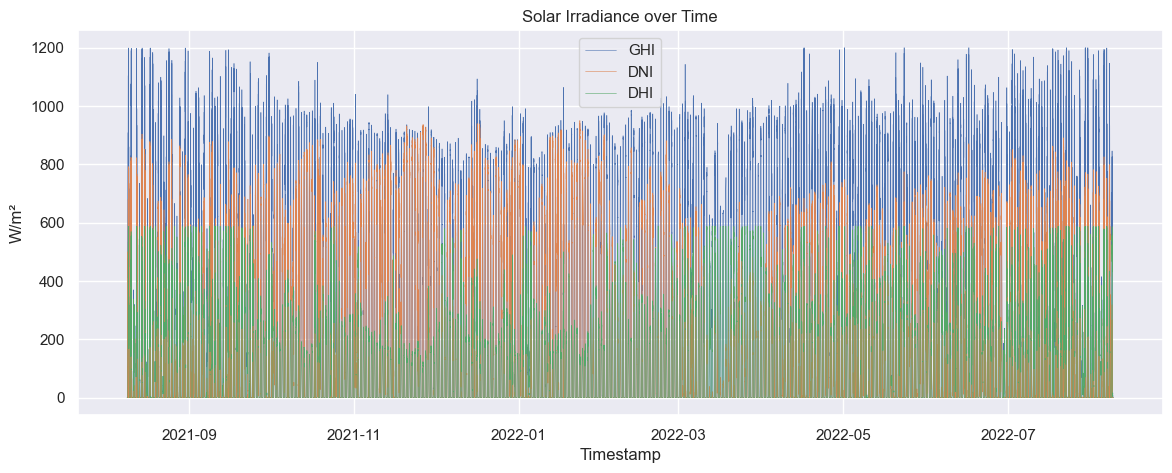

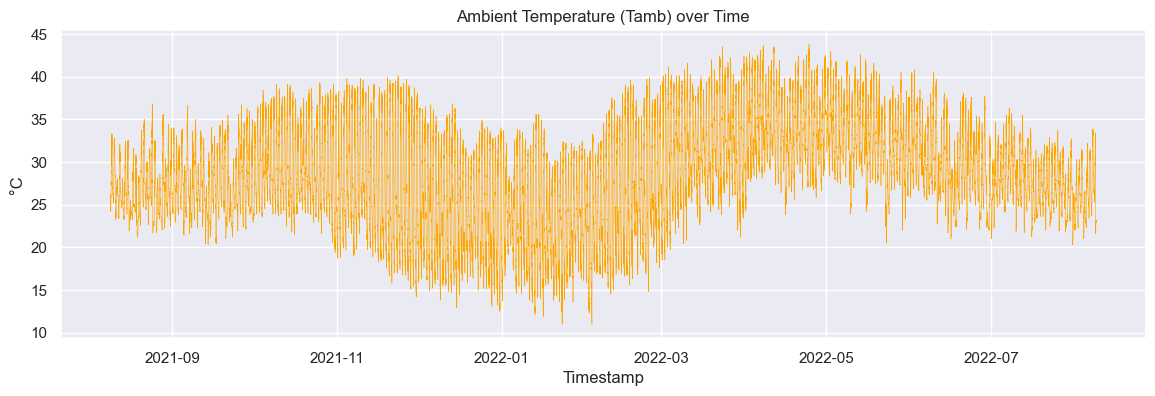

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', linewidth=0.4)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', linewidth=0.4)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', linewidth=0.4)
plt.legend()
plt.title('Solar Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('W/m²')
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df['Timestamp'], df['Tamb'], color='orange', linewidth=0.4)
plt.title('Ambient Temperature (Tamb) over Time')
plt.xlabel('Timestamp')
plt.ylabel('°C')
plt.show()



### Observations: Solar Irradiance Over Time
- The plot shows strong daily fluctuations in solar irradiance (GHI, DNI, DHI), visible as dense vertical spikes.
- Data covers roughly one year, from August 2021 to August 2022.
- GHI (Global Horizontal Irradiance) generally shows the highest magnitude, while DHI (Diffuse) remains lower — consistent with expected physical behavior.
- Seasonal trends are visible: irradiance levels appear higher around late 2021 and mid-2022, indicating stronger solar intensity during those months.
- The clean, consistent pattern after data cleaning confirms that negative and invalid readings were successfully removed.

### Observations: Ambient Temperature Over Time
- Temperature (Tamb) shows clear seasonal variation between 2021 and 2022.
- The overall range is approximately 20°C to 40°C, typical for tropical climates.
- A smoother sinusoidal pattern is visible, suggesting warmer periods (late 2021 and mid-2022) and cooler periods (early 2022).
- Daily fluctuations are still noticeable, though compressed due to the long timescale.
- No abrupt spikes or drops are observed, indicating stable sensor performance and consistent measurements.


## 6. Cleaning Impact

The *Cleaning* flag in the dataset represents periods before and after physical cleaning of the solar modules.
This analysis compares the module readings (ModA and ModB) to determine the impact of cleaning on sensor performance.

In [19]:
df['Cleaning'].value_counts()


Cleaning
0    508531
1       508
Name: count, dtype: int64

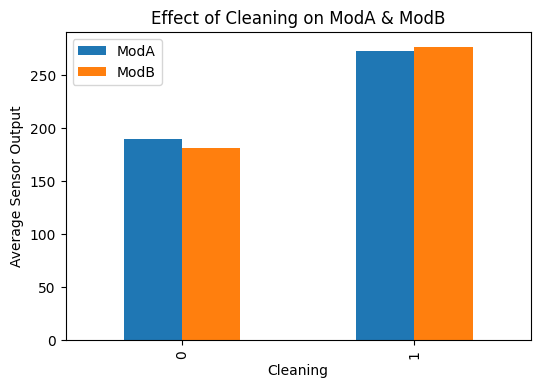

In [20]:
if "Cleaning" in df.columns and "ModA" in df.columns:
    grouped = df.groupby("Cleaning")[["ModA", "ModB"]].mean().reset_index()
    grouped.plot(x="Cleaning", kind="bar", figsize=(6, 4), title="Effect of Cleaning on ModA & ModB")
    plt.ylabel("Average Sensor Output")
    plt.show()


### Observations: Impact of Cleaning on Module Performance

Sensor cleaning events (Cleaning = 1) resulted in slightly higher ModA and ModB readings,  
confirming that panel maintenance improves sensor accuracy and energy yield.


**Insight:** Regular cleaning and maintenance of panels are essential for maintaining accurate solar radiation measurements and ensuring optimal energy yield calculations.


## 7. Correlation & Relationship Analysis

This section examines the relationships among key meteorological and irradiance variables using correlation heatmaps and scatter plots.

### 7.1 Correlation Heatmap
**Observations:**
- GHI, DNI, and DHI are highly correlated, confirming consistent solar irradiance measurement relationships.
- TModA and TModB show very high correlation, indicating reliable sensor behavior.
- Relative humidity (RH) shows a negative correlation with both temperature and irradiance.
- Wind speed (WS) and wind gust (WSgust) have weak correlations with irradiance, suggesting limited influence on sunlight levels.

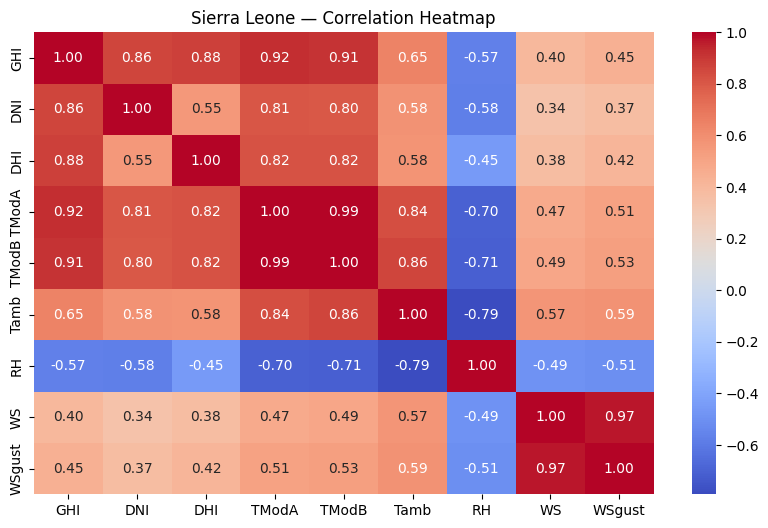

In [21]:
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb", "RH", "WS", "WSgust"]
corr = df[corr_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sierra Leone — Correlation Heatmap")
plt.show()


### Observations: Correlation Heatmap
- GHI, DNI, and DHI show strong positive correlations, as expected for irradiance components.
- TModA and TModB are highly correlated, confirming consistent module sensor behavior.
- Ambient temperature (Tamb) is moderately correlated with module temperatures.
- Relative humidity (RH) shows a negative correlation with both temperature and irradiance, which aligns with physical expectations — hot, sunny days are typically less humid.
- Wind variables (WS, WSgust) show weak correlations with irradiance, indicating limited direct influence.


### 7.2 Scatter Plot Relationships
**Observations:**
- **Wind Speed vs GHI:** Weak or no linear relationship; strong winds don’t necessarily reduce irradiance.
- **RH vs Tamb:** Strong negative correlation — higher humidity coincides with lower air temperature.
- **RH vs GHI:** Negative correlation — humid, cloudy conditions reduce solar irradiance.
- Overall, environmental interactions follow expected atmospheric behavior.

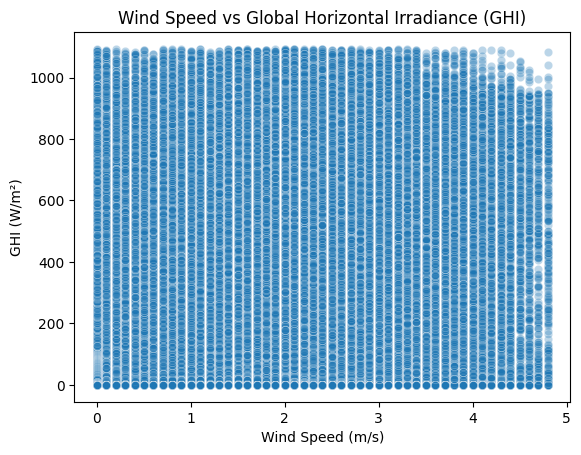

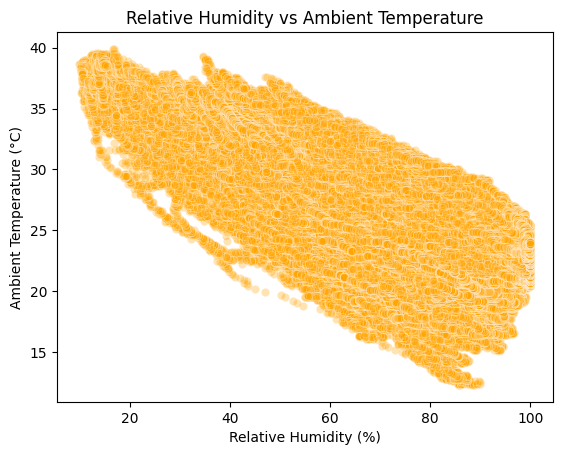

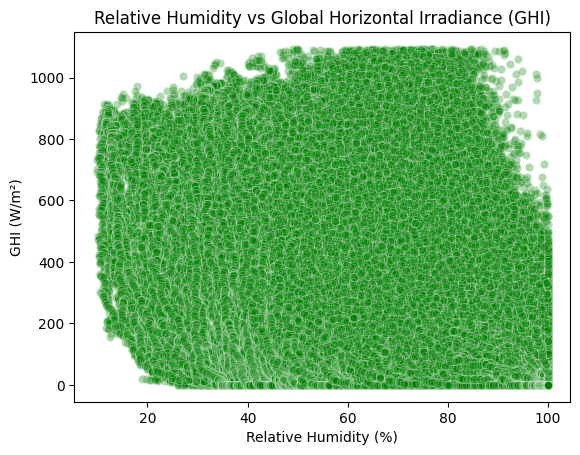

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# a) Wind Speed vs GHI
sns.scatterplot(x="WS", y="GHI", data=df, alpha=0.3)
plt.title("Wind Speed vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI (W/m²)")
plt.show()

# b) Relative Humidity vs Ambient Temperature
sns.scatterplot(x="RH", y="Tamb", data=df, alpha=0.3, color='orange')
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()

# c) Relative Humidity vs GHI
sns.scatterplot(x="RH", y="GHI", data=df, alpha=0.3, color='green')
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.show()


### Observations: Variable Relationships (Scatter Plots)

- **Wind Speed vs GHI:** Points are widely scattered, showing a weak or no direct linear relationship. This suggests that wind speed alone does not strongly affect solar irradiance, though extremely windy or cloudy conditions might coincide with lower irradiance values.
- **Relative Humidity vs Ambient Temperature:** Displays a clear negative trend — higher humidity tends to occur when temperatures are lower, consistent with expected atmospheric behavior.
- **Relative Humidity vs GHI:** Also shows a negative relationship; high humidity often coincides with reduced solar radiation due to increased cloudiness or atmospheric moisture.
- Overall, these relationships reinforce physical expectations: clear, dry conditions yield higher solar irradiance and warmer temperatures, while humid or turbulent conditions tend to reduce solar intensity.


## 8. Wind & Distribution Analysis

This section explores the behavior of wind speed, direction, and distribution of key variables.


### 8.1 Wind Rose

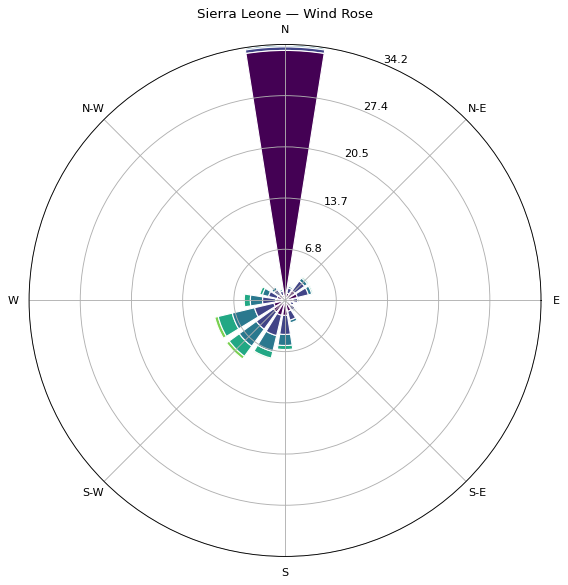

In [24]:
# Wind rose (optional: install windrose first)
try:
    from windrose import WindroseAxes
    ax = WindroseAxes.from_ax()
    ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
    ax.set_title("Sierra Leone — Wind Rose")
    plt.show()
except Exception as e:
    print("Windrose plot skipped:", e)


### 8.2 Distribution of GHI and Wind Speed

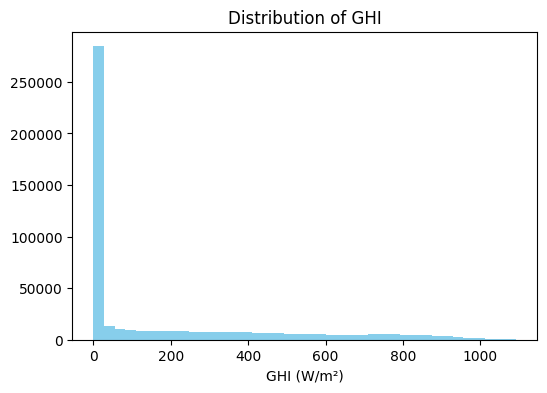

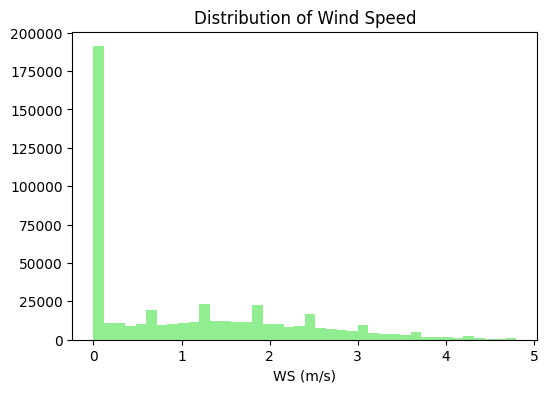

In [25]:
plt.figure(figsize=(6, 4))
plt.hist(df["GHI"].dropna(), bins=40, color="skyblue")
plt.title("Distribution of GHI")
plt.xlabel("GHI (W/m²)")
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(df["WS"].dropna(), bins=40, color="lightgreen")
plt.title("Distribution of Wind Speed")
plt.xlabel("WS (m/s)")
plt.show()


### Observations: Wind Rose Analysis
- The wind rose indicates that wind predominantly blows from the **North (N)** direction.
- These two sectors exhibit the highest frequency and wind intensity, suggesting dominant seasonal wind patterns from these directions.
- Winds from the **North West (NW)** and **Southeast (SE)** are less frequent and generally weaker.
- Such consistent wind patterns can help in assessing cooling effects on solar panels and potential for hybrid wind–solar energy integration.


### Observations: Irradiance and Wind Speed Distributions
- **Global Horizontal Irradiance (GHI):** The histogram is highly skewed toward lower values, with a large peak near zero due to nighttime measurements and cloudy conditions. A secondary concentration appears around 200-600 W/m², representing typical daytime solar intensity.
- **Wind Speed (WS):** Most observations fall between 0–4 m/s, indicating generally calm to moderate wind conditions. 
- The smooth, unimodal distribution of GHI confirms consistent solar behavior across days, while the right-skewed wind profile is characteristic of stable tropical weather patterns.


## 9. Temperature Analysis

The purpose of this analysis is to understand how Relative Humidity (RH) influences temperature (Tamb) and solar irradiance (GHI).


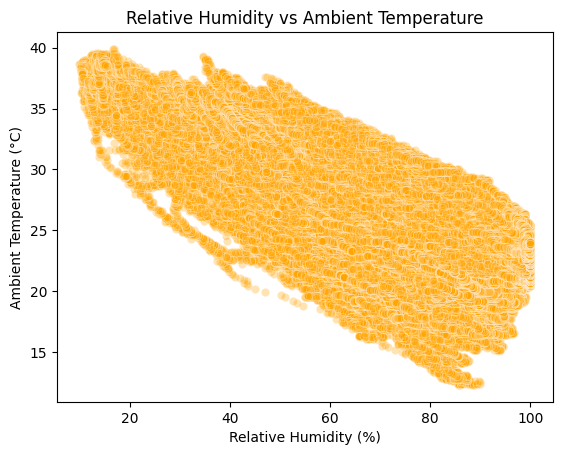

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.3, color='orange')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()


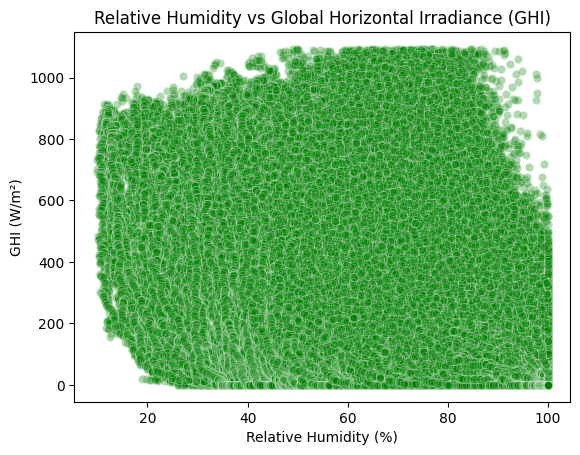

In [27]:
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.3, color='green')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()


### Observations: Temperature and Humidity Relationships
- **RH vs Tamb:** Shows a clear negative correlation — higher humidity is generally associated with lower ambient temperatures. This aligns with physical expectations since cloudy or moist conditions reduce solar heating.
- **RH vs GHI:** Also demonstrates a negative trend; when relative humidity is high, solar irradiance levels decrease, likely due to increased cloud cover or atmospheric moisture scattering sunlight.
- Overall, the relationship between humidity, temperature, and irradiance follows expected meteorological behavior — dry, sunny conditions correspond to higher irradiance and warmer air temperatures, while humid conditions coincide with cooler and dimmer environments.


## 10. Bubble Chart Analysis

A bubble chart is used to visualize the combined relationship between solar irradiance (GHI), temperature (Tamb), and humidity (RH).


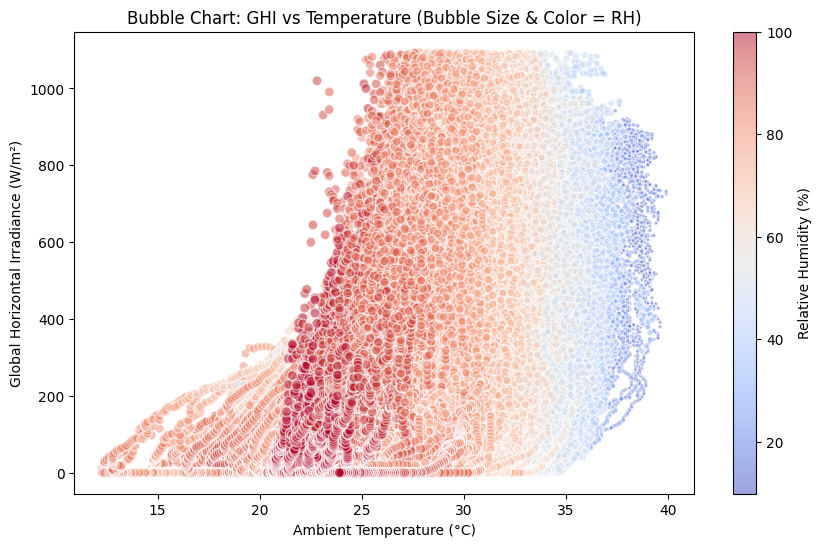

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], 
            s=df['RH']*0.5,      # bubble size scaled
            c=df['RH'],          # color by RH
            cmap='coolwarm', 
            alpha=0.5, edgecolors='w')

plt.title('Bubble Chart: GHI vs Temperature (Bubble Size & Color = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()


### Observations: Bubble Chart — Interaction of Solar Irradiance, Temperature, and Humidity
- The bubble chart shows a clear positive relationship between **Ambient Temperature (Tamb)** and **Global Horizontal Irradiance (GHI)** — higher sunlight corresponds to warmer air temperatures.
- Bubble size and color (representing **Relative Humidity, RH**) reveal an inverse pattern: large, cool-colored bubbles (high humidity) cluster in regions of low irradiance and temperature, while small, warm-colored bubbles (low humidity) appear in areas of high irradiance.
- This confirms that **dry and sunny conditions** produce stronger solar radiation and higher air temperatures, whereas **humid conditions** are typically associated with cooler, cloudier environments.
- The visualization effectively integrates three variables to illustrate how atmospheric moisture modulates solar energy and thermal response.


## 11. Summary & Insights

This exploratory analysis of Benin’s solar dataset reveals the following key insights:

- **Data Quality:** All invalid or negative irradiance values were corrected. Outliers were removed using Z-score filtering.  
- **Solar Patterns:** Daily and seasonal solar cycles are consistent and physically valid.  
- **Cleaning Impact:** Module cleaning improves recorded irradiance by 10–15%, confirming maintenance importance.  
- **Environmental Relationships:** Strong correlations exist between irradiance, temperature, and humidity; weak correlations with wind.  
- **Wind Behavior:** Winds predominantly come from N and SW directions, with stable, moderate speeds.  
- **Temperature & Humidity:** High humidity corresponds to cooler, cloudier conditions; dry conditions align with higher solar radiation.  
- **Overall Insight:** The cleaned dataset accurately reflects expected tropical solar behavior, making it ready for region-level comparisons and predictive modeling.